In [1]:
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [2]:
num_classes = 10
num_epochs = 10

In [3]:
#Loading the dataset and preprocessing
train_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                           download = True)


test_dataset = torchvision.datasets.MNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                          download=True)

In [4]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [5]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(LN1.parameters(), lr=0.01)

In [6]:
def train(bs, lr1, num_epochs, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
            #Forward pass
            outputs = model(images)
            loss = cost(outputs, labels)
            optimizer = optim.SGD(LN1.parameters(), lr1)
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss
            num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [7]:
epochs = []
for i in range(num_epochs):
    epochs.append(i)

In [8]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train(32, 0.0001, num_epochs, train_dataset, LN1, criterion, losses)
lw = torch.FloatTensor(losses)

Epoch [1/10], Loss: 2.1611
Epoch [2/10], Loss: 1.6340
Epoch [3/10], Loss: 0.9717
Epoch [4/10], Loss: 0.6438
Epoch [5/10], Loss: 0.5071
Epoch [6/10], Loss: 0.4369
Epoch [7/10], Loss: 0.3926
Epoch [8/10], Loss: 0.3608
Epoch [9/10], Loss: 0.3371
Epoch [10/10], Loss: 0.3181


In [9]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train(32, 0.001, num_epochs, train_dataset, LN1, criterion, losses)
lw1 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.7581
Epoch [2/10], Loss: 0.2956
Epoch [3/10], Loss: 0.2274
Epoch [4/10], Loss: 0.1898
Epoch [5/10], Loss: 0.1636
Epoch [6/10], Loss: 0.1446
Epoch [7/10], Loss: 0.1299
Epoch [8/10], Loss: 0.1184
Epoch [9/10], Loss: 0.1084
Epoch [10/10], Loss: 0.0999


In [11]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train(32, 0.01, num_epochs, train_dataset, LN1, criterion, losses)
lw2 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.2676
Epoch [2/10], Loss: 0.0896
Epoch [3/10], Loss: 0.0655
Epoch [4/10], Loss: 0.0527
Epoch [5/10], Loss: 0.0460
Epoch [6/10], Loss: 0.0402
Epoch [7/10], Loss: 0.0347
Epoch [8/10], Loss: 0.0317
Epoch [9/10], Loss: 0.0273
Epoch [10/10], Loss: 0.0251


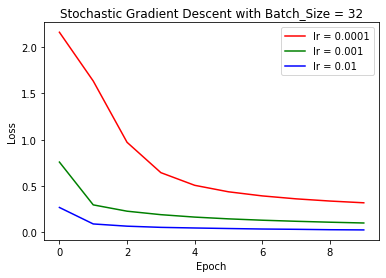

In [12]:
plt.plot(epochs, lw, color='r', label='lr = 0.0001')
plt.plot(epochs, lw1, color='g', label='lr = 0.001')
plt.plot(epochs, lw2, color='b', label='lr = 0.01')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent with Batch_Size = 32")
plt.legend()
plt.show()

In [13]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train(64, 0.0001, num_epochs, train_dataset, LN1, criterion, losses)
lw3 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 2.3366
Epoch [2/10], Loss: 2.1981
Epoch [3/10], Loss: 2.0838
Epoch [4/10], Loss: 1.9150
Epoch [5/10], Loss: 1.6626
Epoch [6/10], Loss: 1.3481
Epoch [7/10], Loss: 1.0489
Epoch [8/10], Loss: 0.8328
Epoch [9/10], Loss: 0.6901
Epoch [10/10], Loss: 0.5915


In [14]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset, LN1, criterion, losses)
lw4 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 1.2122
Epoch [2/10], Loss: 0.3792
Epoch [3/10], Loss: 0.2785
Epoch [4/10], Loss: 0.2334
Epoch [5/10], Loss: 0.2050
Epoch [6/10], Loss: 0.1848
Epoch [7/10], Loss: 0.1687
Epoch [8/10], Loss: 0.1562
Epoch [9/10], Loss: 0.1458
Epoch [10/10], Loss: 0.1368


In [15]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train(64, 0.01, num_epochs, train_dataset, LN1, criterion, losses)
lw5 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.3880
Epoch [2/10], Loss: 0.1257
Epoch [3/10], Loss: 0.0898
Epoch [4/10], Loss: 0.0720
Epoch [5/10], Loss: 0.0614
Epoch [6/10], Loss: 0.0535
Epoch [7/10], Loss: 0.0484
Epoch [8/10], Loss: 0.0438
Epoch [9/10], Loss: 0.0404
Epoch [10/10], Loss: 0.0371


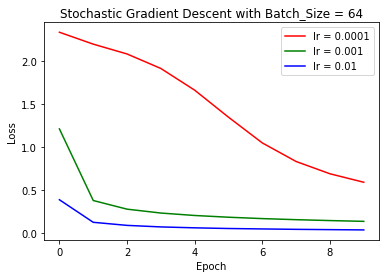

In [16]:
plt.plot(epochs, lw3, color='r', label='lr = 0.0001')
plt.plot(epochs, lw4, color='g', label='lr = 0.001')
plt.plot(epochs, lw5, color='b', label='lr = 0.01')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent with Batch_Size = 64")
plt.legend()
plt.show()

In [17]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train(60000, 0.0001, num_epochs, train_dataset, LN1, criterion, losses)
lw6 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 2.3445
Epoch [2/10], Loss: 2.3444
Epoch [3/10], Loss: 2.3443
Epoch [4/10], Loss: 2.3442
Epoch [5/10], Loss: 2.3441
Epoch [6/10], Loss: 2.3440
Epoch [7/10], Loss: 2.3439
Epoch [8/10], Loss: 2.3439
Epoch [9/10], Loss: 2.3438
Epoch [10/10], Loss: 2.3437


In [18]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train(60000, 0.001, num_epochs, train_dataset, LN1, criterion, losses)
lw7 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 2.3890
Epoch [2/10], Loss: 2.3842
Epoch [3/10], Loss: 2.3796
Epoch [4/10], Loss: 2.3752
Epoch [5/10], Loss: 2.3709
Epoch [6/10], Loss: 2.3667
Epoch [7/10], Loss: 2.3627
Epoch [8/10], Loss: 2.3587
Epoch [9/10], Loss: 2.3549
Epoch [10/10], Loss: 2.3512


In [19]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train(60000, 0.01, num_epochs, train_dataset, LN1, criterion, losses)
lw8 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 2.5552
Epoch [2/10], Loss: 2.4350
Epoch [3/10], Loss: 2.3793
Epoch [4/10], Loss: 2.3442
Epoch [5/10], Loss: 2.3191
Epoch [6/10], Loss: 2.2996
Epoch [7/10], Loss: 2.2833
Epoch [8/10], Loss: 2.2692
Epoch [9/10], Loss: 2.2566
Epoch [10/10], Loss: 2.2449


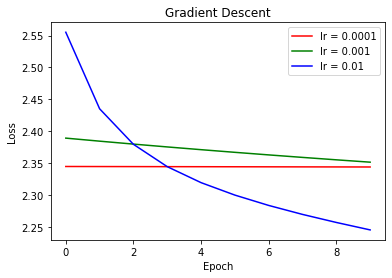

In [20]:
plt.plot(epochs, lw6, color='r', label='lr = 0.0001')
plt.plot(epochs, lw7, color='g', label='lr = 0.001')
plt.plot(epochs, lw8, color='b', label='lr = 0.01')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Gradient Descent")
plt.legend()
plt.show()

In [24]:
def train1(bs, lr1, num_epochs, betas, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
            #Forward pass
            outputs = model(images)
            loss = cost(outputs, labels)
            optimizer = optim.Adam(LN1.parameters(), lr1, 
                                   betas, eps=1e-08, weight_decay=0, amsgrad=True, maximize=False)
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss
            num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [45]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train1(64, 0.0001, num_epochs, (0.999, 0.999), train_dataset, LN1, criterion, losses)
lw9 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6373
Epoch [2/10], Loss: 0.1964
Epoch [3/10], Loss: 0.1443
Epoch [4/10], Loss: 0.1196
Epoch [5/10], Loss: 0.1041
Epoch [6/10], Loss: 0.0948
Epoch [7/10], Loss: 0.0890
Epoch [8/10], Loss: 0.0848
Epoch [9/10], Loss: 0.0811
Epoch [10/10], Loss: 0.0797


In [44]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train1(64, 0.0001, num_epochs, (0.999, 0.989), train_dataset, LN1, criterion, losses)
lw10 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6085
Epoch [2/10], Loss: 0.1950
Epoch [3/10], Loss: 0.1344
Epoch [4/10], Loss: 0.1088
Epoch [5/10], Loss: 0.0948
Epoch [6/10], Loss: 0.0861
Epoch [7/10], Loss: 0.0805
Epoch [8/10], Loss: 0.0748
Epoch [9/10], Loss: 0.0733
Epoch [10/10], Loss: 0.0692


In [43]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train1(64, 0.0001, num_epochs, (0.999, 0.979), train_dataset, LN1, criterion, losses)
lw11 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.5943
Epoch [2/10], Loss: 0.1720
Epoch [3/10], Loss: 0.1277
Epoch [4/10], Loss: 0.1062
Epoch [5/10], Loss: 0.0948
Epoch [6/10], Loss: 0.0864
Epoch [7/10], Loss: 0.0802
Epoch [8/10], Loss: 0.0762
Epoch [9/10], Loss: 0.0725
Epoch [10/10], Loss: 0.0718


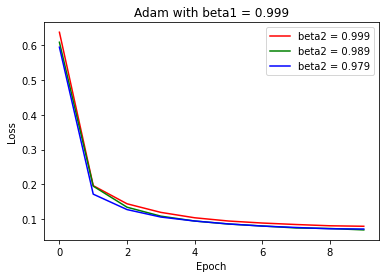

In [46]:
plt.plot(epochs, lw9, color='r', label='beta2 = 0.999')
plt.plot(epochs, lw10, color='g', label='beta2 = 0.989')
plt.plot(epochs, lw11, color='b', label='beta2 = 0.979')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Adam with beta1 = 0.999")
plt.legend()
plt.show()

In [41]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train1(64, 0.0001, num_epochs, (0.998, 0.999), train_dataset, LN1, criterion, losses)
lw12 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6237
Epoch [2/10], Loss: 0.1795
Epoch [3/10], Loss: 0.1323
Epoch [4/10], Loss: 0.1108
Epoch [5/10], Loss: 0.0996
Epoch [6/10], Loss: 0.0934
Epoch [7/10], Loss: 0.0876
Epoch [8/10], Loss: 0.0834
Epoch [9/10], Loss: 0.0814
Epoch [10/10], Loss: 0.0816


In [40]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train1(64, 0.0001, num_epochs, (0.998, 0.989), train_dataset, LN1, criterion, losses)
lw13 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.5878
Epoch [2/10], Loss: 0.1996
Epoch [3/10], Loss: 0.1431
Epoch [4/10], Loss: 0.1149
Epoch [5/10], Loss: 0.1000
Epoch [6/10], Loss: 0.0906
Epoch [7/10], Loss: 0.0845
Epoch [8/10], Loss: 0.0808
Epoch [9/10], Loss: 0.0794
Epoch [10/10], Loss: 0.0781


In [39]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train1(64, 0.0001, num_epochs, (0.998, 0.979), train_dataset, LN1, criterion, losses)
lw14 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.5736
Epoch [2/10], Loss: 0.1780
Epoch [3/10], Loss: 0.1296
Epoch [4/10], Loss: 0.1063
Epoch [5/10], Loss: 0.0955
Epoch [6/10], Loss: 0.0871
Epoch [7/10], Loss: 0.0820
Epoch [8/10], Loss: 0.0784
Epoch [9/10], Loss: 0.0767
Epoch [10/10], Loss: 0.0777


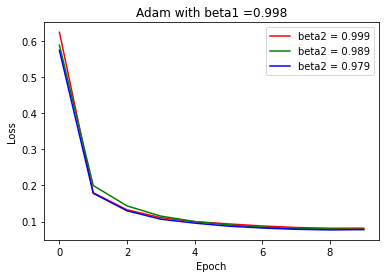

In [42]:
plt.plot(epochs, lw12, color='r', label='beta2 = 0.999')
plt.plot(epochs, lw13, color='g', label='beta2 = 0.989')
plt.plot(epochs, lw14, color='b', label='beta2 = 0.979')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Adam with beta1 =0.998")
plt.legend()
plt.show()

In [47]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train1(64, 0.0001, num_epochs, (0.997, 0.999), train_dataset, LN1, criterion, losses)
lw15 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.5687
Epoch [2/10], Loss: 0.2133
Epoch [3/10], Loss: 0.1578
Epoch [4/10], Loss: 0.1290
Epoch [5/10], Loss: 0.1105
Epoch [6/10], Loss: 0.1002
Epoch [7/10], Loss: 0.0926
Epoch [8/10], Loss: 0.0886
Epoch [9/10], Loss: 0.0846
Epoch [10/10], Loss: 0.0822


In [48]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train1(64, 0.0001, num_epochs, (0.997, 0.989), train_dataset, LN1, criterion, losses)
lw16 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.5335
Epoch [2/10], Loss: 0.1798
Epoch [3/10], Loss: 0.1331
Epoch [4/10], Loss: 0.1096
Epoch [5/10], Loss: 0.0967
Epoch [6/10], Loss: 0.0884
Epoch [7/10], Loss: 0.0824
Epoch [8/10], Loss: 0.0778
Epoch [9/10], Loss: 0.0758
Epoch [10/10], Loss: 0.0745


In [50]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train1(64, 0.0001, num_epochs, (0.997, 0.979), train_dataset, LN1, criterion, losses)
lw17 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6206
Epoch [2/10], Loss: 0.2140
Epoch [3/10], Loss: 0.1582
Epoch [4/10], Loss: 0.1280
Epoch [5/10], Loss: 0.1082
Epoch [6/10], Loss: 0.0979
Epoch [7/10], Loss: 0.0895
Epoch [8/10], Loss: 0.0846
Epoch [9/10], Loss: 0.0810
Epoch [10/10], Loss: 0.0798


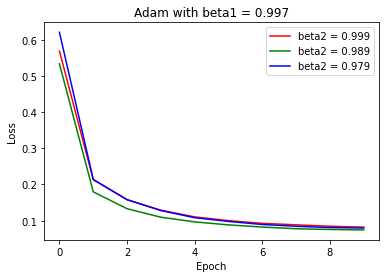

In [51]:
plt.plot(epochs, lw15, color='r', label='beta2 = 0.999')
plt.plot(epochs, lw16, color='g', label='beta2 = 0.989')
plt.plot(epochs, lw17, color='b', label='beta2 = 0.979')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Adam with beta1 = 0.997")
plt.legend()
plt.show()

In [78]:
def train2(bs, lr1,  lr_decay, initial_accumulator_value, num_epochs, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
            #Forward pass
            outputs = model(images)
            loss = cost(outputs, labels)
            optimizer = optim.Adagrad(LN1.parameters(), lr1, lr_decay, initial_accumulator_value, eps=1e-10)
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss
            num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [79]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train2(64, 0.0001, 0, 0.00001, num_epochs, train_dataset, LN1, criterion, losses)
lw18 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.5666
Epoch [2/10], Loss: 0.1736
Epoch [3/10], Loss: 0.1271
Epoch [4/10], Loss: 0.1056
Epoch [5/10], Loss: 0.0943
Epoch [6/10], Loss: 0.0866
Epoch [7/10], Loss: 0.0804
Epoch [8/10], Loss: 0.0766
Epoch [9/10], Loss: 0.0731
Epoch [10/10], Loss: 0.0702


In [80]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train2(64, 0.00012, 0, 0.00001, num_epochs, train_dataset, LN1, criterion, losses)
lw19 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.5494
Epoch [2/10], Loss: 0.1838
Epoch [3/10], Loss: 0.1340
Epoch [4/10], Loss: 0.1101
Epoch [5/10], Loss: 0.0966
Epoch [6/10], Loss: 0.0883
Epoch [7/10], Loss: 0.0839
Epoch [8/10], Loss: 0.0791
Epoch [9/10], Loss: 0.0753
Epoch [10/10], Loss: 0.0728


In [81]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train2(64, 0.00009, 0, 0.00001, num_epochs, train_dataset, LN1, criterion, losses)
lw20 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6336
Epoch [2/10], Loss: 0.1958
Epoch [3/10], Loss: 0.1440
Epoch [4/10], Loss: 0.1172
Epoch [5/10], Loss: 0.1033
Epoch [6/10], Loss: 0.0935
Epoch [7/10], Loss: 0.0883
Epoch [8/10], Loss: 0.0833
Epoch [9/10], Loss: 0.0812
Epoch [10/10], Loss: 0.0785


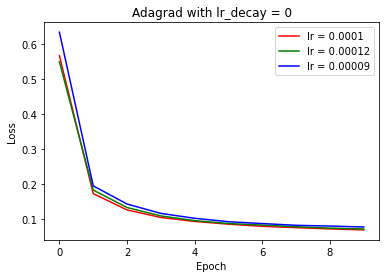

In [82]:
plt.plot(epochs, lw18, color='r', label='lr = 0.0001')
plt.plot(epochs, lw19, color='g', label='lr = 0.00012')
plt.plot(epochs, lw20, color='b', label='lr = 0.00009')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Adagrad with lr_decay = 0")
plt.legend()
plt.show()

In [84]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train2(64, 0.0001, 0.1, 0.00001, num_epochs, train_dataset, LN1, criterion, losses)
lw21 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6145
Epoch [2/10], Loss: 0.1944
Epoch [3/10], Loss: 0.1420
Epoch [4/10], Loss: 0.1154
Epoch [5/10], Loss: 0.1003
Epoch [6/10], Loss: 0.0919
Epoch [7/10], Loss: 0.0870
Epoch [8/10], Loss: 0.0835
Epoch [9/10], Loss: 0.0809
Epoch [10/10], Loss: 0.0794


In [85]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train2(64, 0.00012, 0.1, 0.00001, num_epochs, train_dataset, LN1, criterion, losses)
lw22 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.5353
Epoch [2/10], Loss: 0.1636
Epoch [3/10], Loss: 0.1198
Epoch [4/10], Loss: 0.0996
Epoch [5/10], Loss: 0.0878
Epoch [6/10], Loss: 0.0818
Epoch [7/10], Loss: 0.0772
Epoch [8/10], Loss: 0.0744
Epoch [9/10], Loss: 0.0722
Epoch [10/10], Loss: 0.0710


In [86]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train2(64, 0.00009, 0.1, 0.00001, num_epochs, train_dataset, LN1, criterion, losses)
lw23 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6042
Epoch [2/10], Loss: 0.2045
Epoch [3/10], Loss: 0.1534
Epoch [4/10], Loss: 0.1250
Epoch [5/10], Loss: 0.1077
Epoch [6/10], Loss: 0.0977
Epoch [7/10], Loss: 0.0901
Epoch [8/10], Loss: 0.0844
Epoch [9/10], Loss: 0.0822
Epoch [10/10], Loss: 0.0789


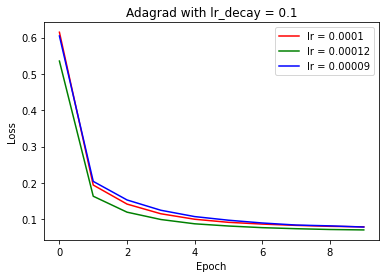

In [87]:
plt.plot(epochs, lw21, color='r', label='lr = 0.0001')
plt.plot(epochs, lw22, color='g', label='lr = 0.00012')
plt.plot(epochs, lw23, color='b', label='lr = 0.00009')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Adagrad with lr_decay = 0.1")
plt.legend()
plt.show()

In [88]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train2(64, 0.0001, 0.01, 0.00001, num_epochs, train_dataset, LN1, criterion, losses)
lw24 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.5700
Epoch [2/10], Loss: 0.1786
Epoch [3/10], Loss: 0.1294
Epoch [4/10], Loss: 0.1075
Epoch [5/10], Loss: 0.0944
Epoch [6/10], Loss: 0.0858
Epoch [7/10], Loss: 0.0811
Epoch [8/10], Loss: 0.0780
Epoch [9/10], Loss: 0.0735
Epoch [10/10], Loss: 0.0720


In [89]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train2(64, 0.00012, 0.01, 0.00001, num_epochs, train_dataset, LN1, criterion, losses)
lw25 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.5132
Epoch [2/10], Loss: 0.1707
Epoch [3/10], Loss: 0.1255
Epoch [4/10], Loss: 0.1062
Epoch [5/10], Loss: 0.0959
Epoch [6/10], Loss: 0.0879
Epoch [7/10], Loss: 0.0825
Epoch [8/10], Loss: 0.0803
Epoch [9/10], Loss: 0.0794
Epoch [10/10], Loss: 0.0774


In [90]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
LN1.apply(init_weights)
losses = []
train2(64, 0.00009, 0.01, 0.00001, num_epochs, train_dataset, LN1, criterion, losses)
lw26 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6495
Epoch [2/10], Loss: 0.2091
Epoch [3/10], Loss: 0.1548
Epoch [4/10], Loss: 0.1254
Epoch [5/10], Loss: 0.1069
Epoch [6/10], Loss: 0.0943
Epoch [7/10], Loss: 0.0865
Epoch [8/10], Loss: 0.0812
Epoch [9/10], Loss: 0.0770
Epoch [10/10], Loss: 0.0742


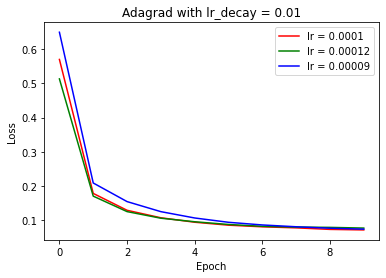

In [91]:
plt.plot(epochs, lw24, color='r', label='lr = 0.0001')
plt.plot(epochs, lw25, color='g', label='lr = 0.00012')
plt.plot(epochs, lw26, color='b', label='lr = 0.00009')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Adagrad with lr_decay = 0.01")
plt.legend()
plt.show()

Adam optimizer: is computationally efficient, requires less memory during the process, works well with sparse gradients and from the training its understood that hyper-parameters have intuitive interpretation and typically require a little tuning. Addtionally Adam optimizer works better when we have beta values close to one and they converge faster. When we change the beta2 values which is less than one but far from one the loss does not decrease for initial epochs and its the same case with the beta1 values.

Gradient Descent (GD): It is expensive to calculate the gradients if the size of the data is huge as we are taking the whole dataset. It works well for convex functions as it evaluates that the gradient is reducing and follows that trend and eventually converges to global minimum but GD does not work for nonconvex functions as we are not able to determine the global minimum due to the cases such as saddle points, mulitplie local minima, convave region or a flat region. 

Stochastic Gradient Descent: works better with not too large and not too small learning rate, within less than one. It needs forward and backward propagation for every record and therefore slow computation speed and additionally the path to reach global minima becomes very noisy. One more problem is with the constant learning rate for every epoch. Moreover, it is not able to handle saddle points very well.

Adagrad optimizer: It decreases the learning rate aggressively and monotonically. There might be a point when the learning rate becomes extremely small. Due to small learning rates, the model eventually becomes unable to acquire more knowledge, and hence the accuracy of the model is compromised. Adagrad works better generally due to frequent updates in the learning rate and it is best when used for dealing with sparse data. It works well with a learning rate around the values of 0.0001 such as 0.0001, 0.00012, 0.00009 and learning rate decay of 0.1, 0.01 and 0. All the values are tested with initial_accumulator_value of 0.00001. Trying with other learning rates and learning rate decay values shows a trend where the loss decreases for some epochs and then it starts to increase. 